## An overview of several optimization algorithms, and their implementation using Python

### Collected by Habib Ezzatabadi
#### You can refer to <a href="[url](https://github.com/stats9/math-and-python)"> stats9/Github </a> to access the Jupyter document.
<hr><hr>
<br><br><br><br>

Before introducing the algorithms, it is necessary to introduce two terms that are used a lot in the field of optimization.

#### Hessian Matrix <a href="#f1"><bdi>[1]</bdi></a>


In mathematics, the Hessian matrix or Hessian is a square matrix of second-order partial derivatives of a scalar-valued function, or scalar field. It describes the local curvature of a function of many variables. The Hessian matrix was developed in the 19th century by the German mathematician Ludwig Otto Hesse and later named after him. Hesse originally used the term "functional determinants". 

Suppose ${\displaystyle f:\mathbb {R} ^{n}\to \mathbb {R} }$ is a function taking as input a vector $ {\displaystyle \mathbf {x} \in \mathbb {R} ^{n}}$ and outputting a scalar  ${\displaystyle f(\mathbf {x} )\in \mathbb {R} .}$ If all second-order partial derivatives of f exist, then the Hessian matrix $\mathbf{H}$ of f  is a square $n\times n$ matrix, usually defined and arranged as follows: 

$$
\large {\displaystyle \mathbf {H} = {\begin{bmatrix} {\dfrac {\partial ^{2}f} {\partial x_{1}^{2}}} & {\dfrac {\partial ^{2}f}{ \partial x_{1} \, \partial x_{2}}} & \cdots & {\dfrac {\partial ^{2} f} {\partial x_{1}\, \partial x_{n}}} \\[2.2ex] {\dfrac {\partial ^{2}f} {\partial x_{2}\, \partial x_{1}}} & {\dfrac {\partial ^{2}f}{\partial x_{2}^{2}}}& \cdots & {\dfrac {\partial ^{2}f} {\partial x_{2}\,\partial x_{n}}} \\[2.2ex] \vdots & \vdots & \ddots & \vdots \\[2.2ex] {\dfrac {\partial ^{2} f} {\partial x_{n}\, \partial x_{1}}} & {\dfrac {\partial ^{2} f} {\partial x_{n}\, \partial x_{2}}} & \cdots & {\dfrac {\partial ^{2}f} {\partial x_{n}^{2}}} \end{bmatrix}}}
$$

<br><br><br><br>

#### Gradient vector <a href="#f2"><bdi>[2]</bdi></a>


In vector calculus, the gradient of a scalar-valued differentiable function f of several variables is the vector field (or vector-valued function) $\nabla f$ whose value at a point p, p is the "direction and rate of fastest increase". If the gradient of a function is non-zero at a point p, the direction of the gradient is the direction in which the function increases most quickly from p, and the magnitude of the gradient is the rate of increase in that direction, the greatest absolute directional derivative. Further, a point where the gradient is the zero vector is known as a stationary point. The gradient thus plays a fundamental role in optimization theory, where it is used to maximize a function by gradient ascent. In coordinate-free terms, the gradient of a function ${\displaystyle f({\bf {{r})}}}$ may be defined by:

$$
{\displaystyle df=\nabla f\cdot d{\bf {r}}}
$$
where df is the total infinitesimal change in f for an infinitesimal displacement  ${\displaystyle d{\bf {r}}}$, and is seen to be maximal when ${\displaystyle d{\bf {r}}}$ is in the direction of the gradient $\nabla f.$ The nabla symbol $\nabla$ , written as an upside-down triangle and pronounced "del", denotes the vector differential operator.

When a coordinate system is used in which the basis vectors are not functions of position, the gradient is given by the vector whose components are the partial derivatives of f at p  That is, for ${\displaystyle f\colon \mathbb {R} ^{n}\to \mathbb {R} }$, its gradient ${\displaystyle \nabla f\colon \mathbb {R} ^{n}\to \mathbb {R} ^{n}}$ is defined at the point ${\displaystyle p=(x_{1},\ldots ,x_{n})}$ in n-dimensional space as the vector

$$
{\displaystyle \nabla f(p)={\begin{bmatrix}{\frac {\partial f}{\partial x_{1}}}(p)\\\vdots \\{\frac {\partial f}{\partial x_{n}}}(p)\end{bmatrix}}.}
$$

<br><br><br><br>

#### 1. Nelder-Mead  <a href="#f3"><bdi>[3]</bdi></a>

The Nelder–Mead method (also downhill simplex method, amoeba method, or polytope method) is a numerical method used to find the <br>
minimum or maximum of an objective function in a multidimensional space. It is a direct search method (based on function comparison)<br>
and is often applied to nonlinear optimization problems for which derivatives may not be known. However, <br>
the Nelder–Mead technique is a heuristic <a href="#f4"><bdi>[4]</bdi></a> search method that can converge <br>
to non-stationary points on problems that can be solved by alternative methods.<br>

The Nelder–Mead technique was proposed by John Nelder and Roger Mead in 1965 as a development of the method of Spendley et al.

In [22]:
import numpy as np
from scipy import*
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sympy import*
from numpy.random import default_rng
rng = default_rng(1234)


In [23]:
n = 50
x0 = stats.norm.rvs(loc = 2, scale = 3.5, size = n, random_state = rng)
def f(x, y):
    return 1/np.sqrt(2* (x[1] ** 2) * np.pi) * np.exp(-1/(2 * x[1]**2) * (y - x[0])**2)

In [24]:
np.std(x0)

4.019120686839295

In [25]:
def g(x):
   return np.log(f(x, y = x0)).sum()

In [26]:
arrg = 2, 3.5
def k(y):
    return f(x = arrg, y = y)


c:\Users\habib\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


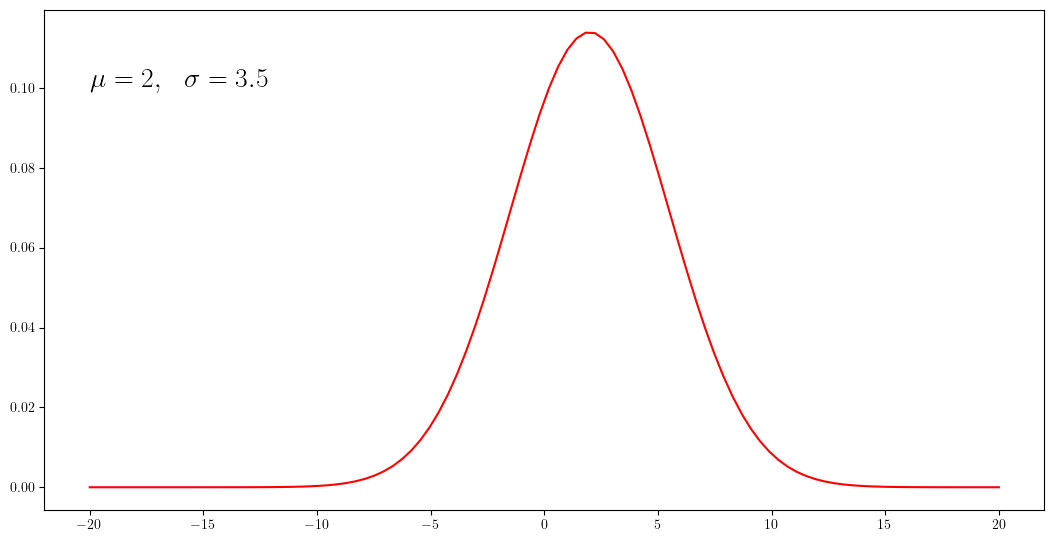

In [27]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['text.usetex'] = True

x = np.linspace(-20, 20, 100)
fig = plt.figure()
object = fig.add_axes([0, 0, 1, 1])
object.plot(x, k(x), color='red')
object.text(x = -20, y = .1, s = "$\mu = 2, ~~\sigma = 3.5$", fontsize = 20, fontweight = 'bold')
plt.show()

In [28]:
def f2(x):
    return -g(x)

xx = np.array([np.std(x0), np.mean(x0)])

In [29]:
res_nelder_mead = minimize(f2, x0 = xx, method = 'nelder-mead', bounds = [(-np.inf, np.inf), (.0001, np.inf)])

In [30]:
res_nelder_mead.x

array([1.55350159, 4.01910117])

<br><br><br><br>
#### 2. BFGS <a href="#f4"><bdi>[4]</bdi></a>

In numerical optimization, the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm is an iterative method for solving unconstrained nonlinear optimization problems. Like the related Davidon–Fletcher–Powell method, BFGS determines the descent direction by preconditioning the gradient with curvature information. It does so by gradually improving an approximation to the Hessian matrix of the loss function, obtained only from gradient evaluations (or approximate gradient evaluations) via a generalized secant method.

In [31]:
res_bfgs = minimize(f2, x0 = xx, method = 'BFGS')

In [32]:
res_bfgs.x

array([1.5534664 , 4.01912126])

In [33]:
x, m, s, p = symbols('x mu sigma pi')
fun_normal = 1 / sqrt(2 * p * s**2) * exp(-1 / (2 * s ** 2) * (x - m)**2)
fun_normal

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi*sigma**2))

In [34]:

simplify(hessian(fun_normal, varlist = (m, s)))

Matrix([
[           sqrt(2)*sqrt(pi*sigma**2)*(-sigma**2 + (mu - x)**2)*exp(-(mu - x)**2/(2*sigma**2))/(2*pi*sigma**6),                   sqrt(2)*sqrt(pi*sigma**2)*(mu - x)*(3*sigma**2 - (-mu + x)**2)*exp(-(mu - x)**2/(2*sigma**2))/(2*pi*sigma**7)],
[sqrt(2)*sqrt(pi*sigma**2)*(mu - x)*(3*sigma**2 - (-mu + x)**2)*exp(-(mu - x)**2/(2*sigma**2))/(2*pi*sigma**7), sqrt(2)*pi*(2*sigma**4 - 5*sigma**2*(mu - x)**2 + (mu - x)**4)*exp(-(mu - x)**2/(2*sigma**2))/(2*sigma**4*(pi*sigma**2)**(3/2))]])

<br><br><br><br>
#### 3. Newton-CG <a href="#f5"><bdi>[5]</bdi></a>



Newton-Conjugate Gradient algorithm is a modified Newton’s method and uses a conjugate gradient algorithm to (approximately) invert the local Hessian. Newton’s method is based on fitting the function locally to a quadratic form:

$$
f(x) \approx f(x_0) + \nabla f(x_0).(x-x_0) + \frac{1}{2}(x-x_0)^T \mathbf{H}(x_0)(x-x_0).
$$

where $\mathbf{H}(x_0)$ is a matrix of second-derivatives (the Hessian). If the Hessian is positive definite then the local minimum of this function can be found by setting the gradient of the quadratic form to zero, resulting in
$$
x_{opt} = x_0 - \mathbf{H}^{-1} \nabla f.
$$
The inverse of the Hessian is evaluated using the conjugate-gradient method. <br><br><br><br>

#### 4. L-BFGS <a href="#f6"><bdi>[6]</bdi></a>

Limited-memory BFGS (L-BFGS or LM-BFGS) is an optimization algorithm in the family of quasi-Newton methods that <br>
approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm (BFGS) using a limited amount of computer memory. <br>
It is a popular algorithm for parameter estimation in machine learning. The algorithm's target problem is to minimize<br>
${\displaystyle f(\mathbf {x} )}$ over unconstrained values of the real-vector ${\displaystyle \mathbf {x}}$  where ${\displaystyle f}$ is a differentiable scalar function.<br>

Like the original BFGS, L-BFGS uses an estimate of the inverse Hessian matrix to steer its search through variable space, <br>
but where BFGS stores a dense ${\displaystyle n\times n}$ approximation to the inverse Hessian (n being the number of variables in the problem), <br>
L-BFGS stores only a few vectors that represent the approximation implicitly. Due to its resulting linear memory requirement, <br>
the L-BFGS method is particularly well suited for optimization problems with many variables. Instead of the inverse Hessian $\mathbf{H}_k$, <br>
L-BFGS maintains a history of the past m updates of the position x and gradient $\nabla f(x)$, <br>
where generally the history size m can be small <br>
(often ${\displaystyle m<10}$). These updates are used to implicitly do operations requiring the $\mathbf{H}_k$-vector product.

In [35]:
res_lbfgs = minimize(f2, x0 = xx, method='L-BFGS-B')

In [36]:
res_lbfgs.x

array([1.55345425, 4.01911153])

<br><br><br>
#### 5. Brent <a href="#f7"><bdi>[7]</bdi></a>

In numerical analysis, Brent's method is a hybrid root-finding algorithm combining the bisection method, the secant method and inverse quadratic interpolation. It has the reliability of bisection but it can be as quick as some of the less-reliable methods. The algorithm tries to use the potentially fast-converging secant method or inverse quadratic interpolation if possible, but it falls back to the more robust bisection method if necessary. Brent's method is due to Richard Brent and builds on an earlier algorithm by Theodorus Dekker. Consequently, the method is also known as the Brent–Dekker method.

Modern improvements on Brent's method include Chandrupatla's method, which is simpler and faster for functions that are flat around their roots; Ridders' method, which performs exponential interpolations instead of quadratic providing a simpler closed formula for the iterations; and the ITP method which is a hybrid between regula-falsi and bisection that achieves optimal worst-case and asymptotic guarantees. 

In [38]:
x02 = stats.expon.rvs(loc = 0, scale = 2.5, size = 50, random_state = n)

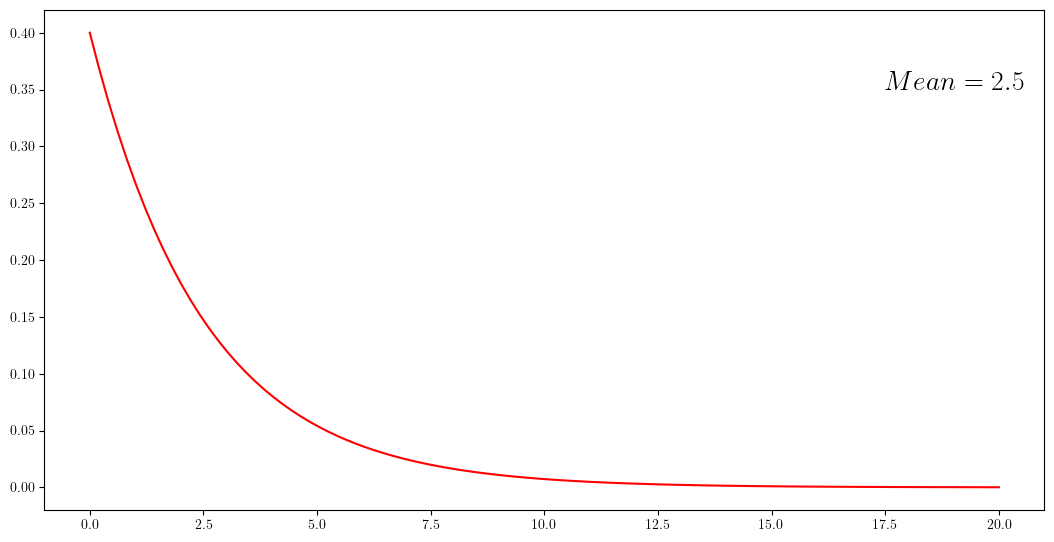

In [45]:
def fexp(sig, x):
    return 1/sig * np.exp(-x/sig)
sig = 2.5
def kexp(x):
    return fexp(sig = sig, x = x)
x = np.linspace(0, 20, 100)
fig = plt.figure()
object = fig.add_axes([0, 0, 1, 1])
object.plot(x, kexp(x), color='red')
object.text(x = 17.5, y = .35, s = "$Mean = 2.5$", fontsize = 20, fontweight = 'bold')
plt.show()

In [47]:
def g2(x):
   return -np.log(fexp(sig, x = x02)).sum()

In [48]:
from scipy.optimize import minimize_scalar
res = minimize_scalar(g2, method='brent')
print(res.x)

2.6180339603380443


<br><br><br><br>
<hr>


### Reffrences

<p id = "f1">[1] <a href="https://en.wikipedia.org/wiki/Hessian_matrix"> Hessain-Matrix </a></p>
<p id = "f2">[2] <a href="https://en.wikipedia.org/wiki/Gradient"> Gradient-Vector </a></p>
<p id = "f3">[3] <a href="https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method"> Nelder-Mead </a></p>
<p id = "f4">[4] <a href="https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm#:~:text=In%20numerical%20optimization%2C%20the%20Broyden,the%20gradient%20with%20curvature%20information."> BFGS  </a></p>
<p id = "f5">[5] <a href="https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization"> Newton-CG </a></p>
<p id = "f6">[6] <a href="https://en.wikipedia.org/wiki/Limited-memory_BFGS"> LBFGS-Method-B </a></p>
<p id = "f7">[7] <a href="https://en.wikipedia.org/wiki/Brent%27s_method"> Brent Method </a></p>
